In [29]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from matplotlib import cm
from scipy.optimize import curve_fit

In [23]:
def execute(size ,thread_count = 8) -> int:
    """Запускает написанную программу

    Args:
        a_shape (int, int): Размер левой матрицы
        b_shape (_type_): Размер правой матрицы
        thread_count (int, optional): Количество потоков

    Returns:
        int: Время работы в миллисекундах
    """
    global path, executableName
    result = subprocess.Popen([path+executableName, str(size), str(thread_count)], stdout = subprocess.PIPE)
    stdout, stderr = result.communicate()
    return int(stdout.decode('utf-8').split(' ')[1])

In [24]:
path = r'/home/vladimir/BOTAY!/CplusplusHOMEWORK/Зачет/'
executableName = 'm'

In [26]:
length_values = np.linspace(100, 6000, 10, dtype = np.int64)
thread_q = np.arange(8) + 1

results = {num: [] for num in thread_q}

for num in thread_q:
    print(f"Число потоков = {num}")
    print('_' * 20)
    for length in length_values:
        result = execute(length, num)
        print("число предложений ", length)
        print("время выполнения ",result, " мс")
        results[num].append(result)

Число потоков = 1
____________________
число предложений  100
время выполнения  219  мс
число предложений  755
время выполнения  11517  мс
число предложений  1411
время выполнения  36438  мс
число предложений  2066
время выполнения  76941  мс
число предложений  2722
время выполнения  139069  мс
число предложений  3377
время выполнения  209503  мс
число предложений  4033
время выполнения  295635  мс
число предложений  4688
время выполнения  400444  мс
число предложений  5344
время выполнения  528878  мс
число предложений  6000
время выполнения  675104  мс
Число потоков = 2
____________________
число предложений  100
время выполнения  103  мс
число предложений  755
время выполнения  5814  мс
число предложений  1411
время выполнения  19030  мс
число предложений  2066
время выполнения  40491  мс
число предложений  2722
время выполнения  74185  мс
число предложений  3377
время выполнения  113311  мс
число предложений  4033
время выполнения  158391  мс
число предложений  4688
время выполнени

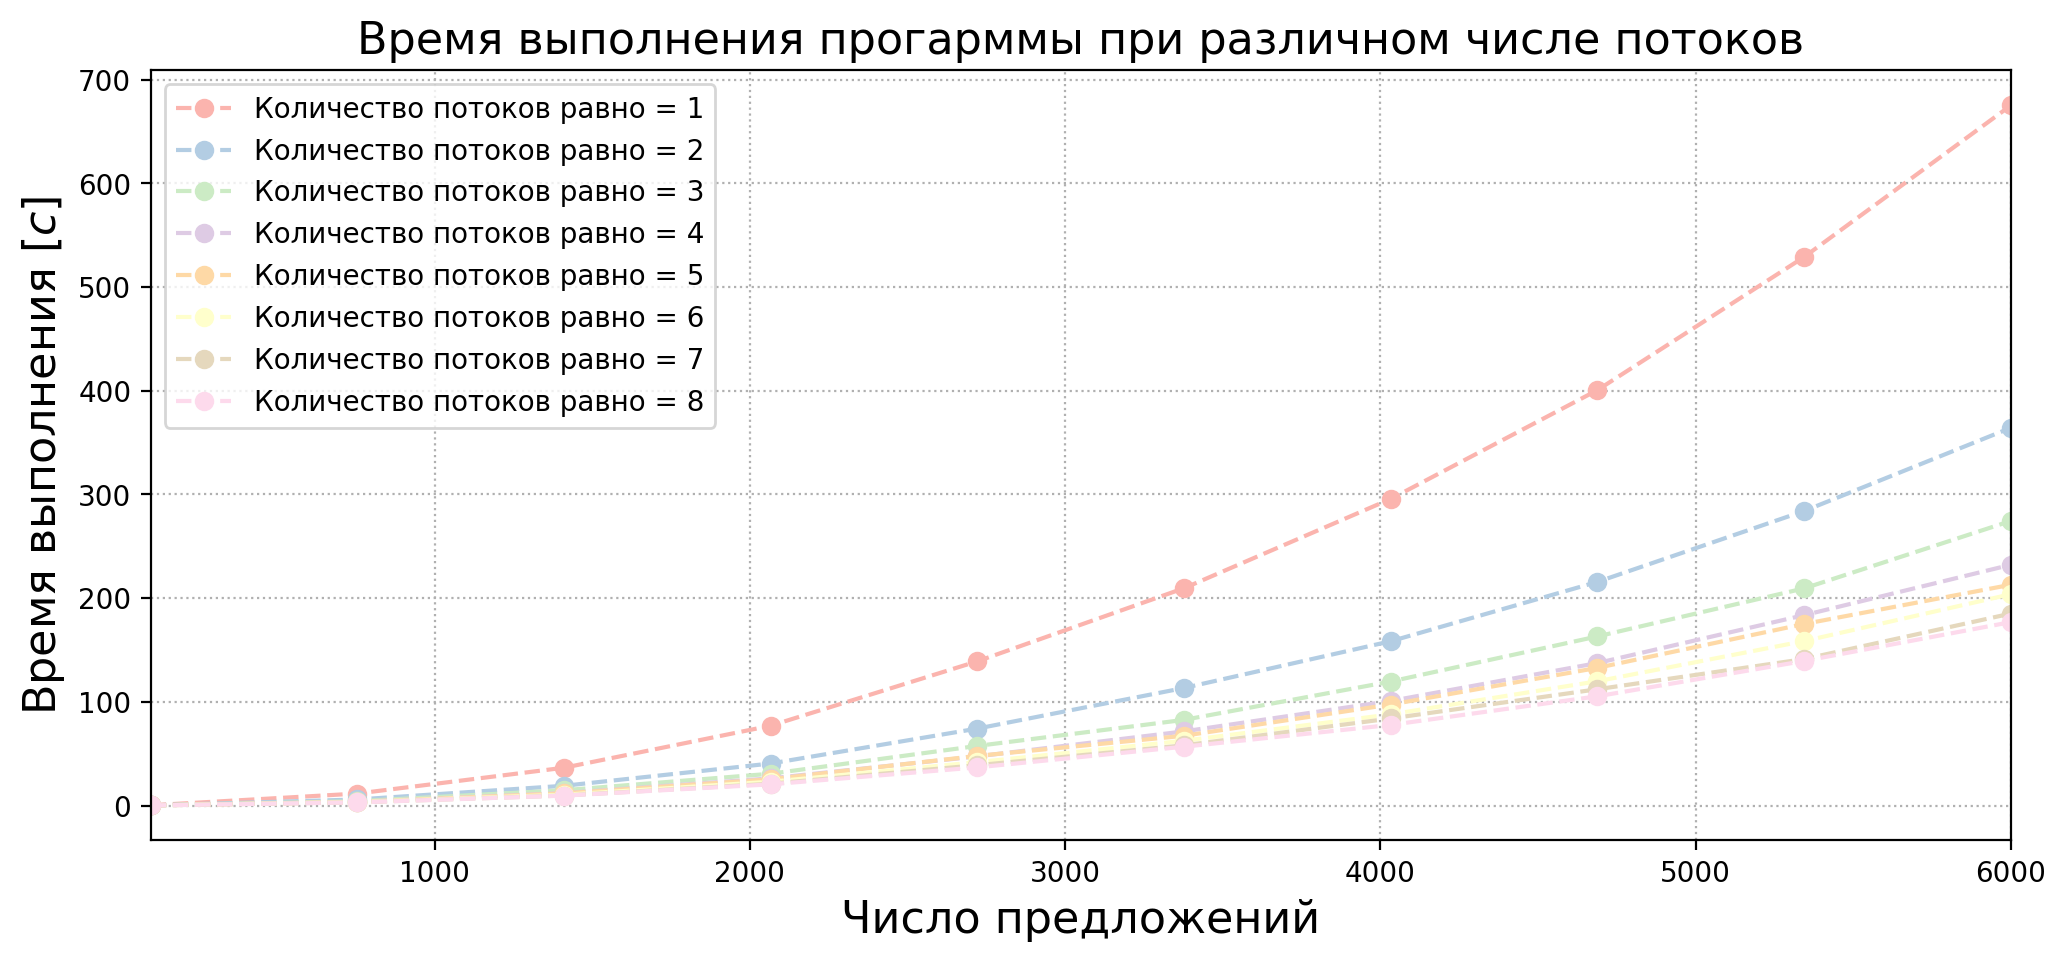

In [49]:
fig, ax = plt.subplots(figsize = (12, 5), dpi = 200)

for ind, num in enumerate(thread_q):
    color = cm.Pastel1(ind / len(thread_q))
    plt.plot(length_values,
             np.array(results[num]) / 1000,
             'o--',
             label = f'Количество потоков равно = {num}',
             color = color)
    
    
plt.xlim(min(length_values), max(length_values))
plt.legend()
plt.xlabel("Число предложений", fontsize = 16)
plt.ylabel("Время выполнения $[с]$", fontsize = 16)
plt.title("Время выполнения прогарммы при различном числе потоков",
          fontsize = 16);
plt.grid(ls = ':')